## Eager Executaion

In [1]:
import tensorflow as tf

tf.enable_eager_execution()

In [4]:
print(tf.add(1,2))
print(tf.add([1,2],[3,4]))
print(tf.square(5))
print(tf.reduce_sum([1,2,3]))
print(tf.encode_base64("hello world"))

print(tf.square(2) + tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(b'aGVsbG8gd29ybGQ', shape=(), dtype=string)
tf.Tensor(13, shape=(), dtype=int32)


In [5]:
x = tf.matmul([[1]], [[2,3]])
print(x.shape)
print(x.dtype)

(1, 2)
<dtype: 'int32'>


In [7]:
import numpy as np
ndarray = np.ones([3,3])

tensor = tf.multiply(ndarray, 42)
print(tensor)
print(np.add(tensor,1))
print(tensor.numpy())

tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


In [8]:
x = tf.random_uniform([3,3])
print(tf.test.is_gpu_available())
print(x.device.endswith('GPU:0'))

False
False


In [9]:
import time

def time_matmul(x):
    start = time.time()
    for loop in range(10):
        tf.matmul(x,x)
    result = time.time() - start
    print("10 loops: {:0.2f}ms".format(1000*result))

In [10]:
print("On CPU:")
with tf.device("CPU:0"):
    x = tf.random_uniform([1000,1000])
    assert x.device.endswith("CPU:0")
    time_matmul(x)

if tf.test.is_gpu_available():
    with tf.device("GPU:0"):
        x = tf.random_uniform([1000,1000])
        assert x.device.endswith("GPU:0")
        time_matmul(x)

On CPU:
10 loops: 112.12ms


In [11]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1,2,3,4,5,6])

In [12]:
import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
    f.write("""Line1
    Line2
    Line3
    """)

ds_file = tf.data.TextLineDataset(filename)

In [15]:
print(filename)

/var/folders/r4/ld0lj9qx2r9dbdjl8zmcyzqm0000gn/T/tmp931qs_6a


In [17]:
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)
ds_file = ds_file.batch(2)

In [20]:
for x in ds_tensors:
    print(x)

for x in ds_file:
    print(x)

tf.Tensor([1 9], shape=(2,), dtype=int32)
tf.Tensor([ 4 16], shape=(2,), dtype=int32)
tf.Tensor([25 36], shape=(2,), dtype=int32)
tf.Tensor([b'Line1' b'    Line2'], shape=(2,), dtype=string)
tf.Tensor([b'    Line3' b'    '], shape=(2,), dtype=string)


## Automatic Differentiation

In [21]:
import tensorflow as tf

tf.enable_eager_execution()

In [22]:
x = tf.ones((2,2))
with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y,y)

dz_dx = t.gradient(z,x)
for i in [0,1]:
    for j in [0,1]:
        assert dz_dx[i][j].numpy() == 8.0

In [23]:
x = tf.ones((2,2))
with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y,y)

dz_dx = t.gradient(z,y)
assert dz_dx.numpy() == 8.0

In [28]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x*x
    z = y*y
dz_dx = t.gradient(z,x)
dy_dx = t.gradient(y,x)
del t

In [29]:
print(dz_dx)

tf.Tensor(108.0, shape=(), dtype=float32)


In [39]:
def f(x,y):
    output = 1.0
    for i in range(y):
        if i > 1 and i < 5:
            output = tf.multiply(output, x)
    return output

In [31]:
def grad(x,y):
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x,y)
    return t.gradient(out, x)

In [41]:
x = tf.convert_to_tensor(2.0)

assert grad(x, 6).numpy() == 12.0 # 3x^2 with x=2
assert grad(x, 5).numpy() == 12.0 # 3x^2 with x=2
assert grad(x, 4).numpy() == 4.0 # 2x^1 with x=2

In [42]:
x = tf.Variable(1.0)

with tf.GradientTape() as t:
    with tf.GradientTape() as t2:
        y = x * x * x
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

assert dy_dx.numpy() == 3.0 # 3x^2 with x=1
assert d2y_dx2.numpy() == 6.0 # 2 * (3x^1) with x=1

## Custom training

In [1]:
import tensorflow as tf

tf.enable_eager_execution()

In [2]:
x = tf.zeros([10,10])
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [3]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

v.assign(3.0)
assert v.numpy() == 3.0

v.assign(tf.square(v))
assert v.numpy() == 9.0

In [4]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x +self.b
    
model = Model()
assert model(3.0).numpy() == 15.0

In [5]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [6]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

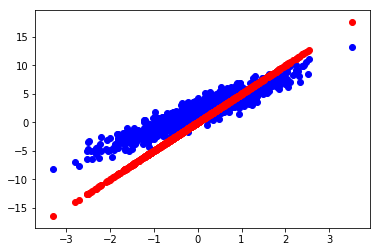

Current loss: 
8.513459


In [8]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), outputs).numpy())

In [11]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [14]:
model = Model()

Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))  

Epoch  0: W=5.00 b=0.00, loss=8.51346
Epoch  1: W=4.62 b=0.38, loss=5.92669
Epoch  2: W=4.32 b=0.68, loss=4.23922
Epoch  3: W=4.07 b=0.93, loss=3.13836
Epoch  4: W=3.87 b=1.13, loss=2.42016
Epoch  5: W=3.70 b=1.29, loss=1.95158
Epoch  6: W=3.57 b=1.41, loss=1.64586
Epoch  7: W=3.47 b=1.52, loss=1.44638
Epoch  8: W=3.38 b=1.60, loss=1.31622
Epoch  9: W=3.31 b=1.67, loss=1.23129


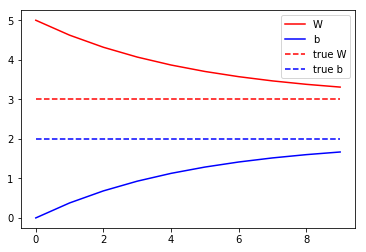

In [15]:
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--')
plt.plot([TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

## Custom Layers

In [16]:
import tensorflow as tf

tf.enable_eager_execution()

In [17]:
# In the tf.keras.layers package, layers are objects. To construct a layer,
# simply construct the object. Most layers take as a first argument the number
# of output dimensions / channels.
layer = tf.keras.layers.Dense(100)
# The number of input dimensions is often unnecessary, as it can be inferred
# the first time the layer is used, but it can be provided if you want to 
# specify it manually, which is useful in some complex models.
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [18]:
layer(tf.zeros([10,5]))

<tf.Tensor: id=1481, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [19]:
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.52685004,  0.3458758 , -0.06937867,  0.56452245,  0.00383228,
          0.41134053,  0.31976998,  0.58282524,  0.55265623,  0.40641993],
        [-0.5002563 ,  0.28298676,  0.4997118 ,  0.5520938 ,  0.5489971 ,
          0.23740321,  0.1698361 , -0.07996786,  0.40189475, -0.24589306],
        [ 0.1757924 , -0.5068584 ,  0.5798158 , -0.2451922 , -0.33513734,
          0.22942466, -0.5504722 , -0.37409657, -0.01712197, -0.14811158],
        [ 0.45342416,  0.48702103,  0.44484383,  0.3110593 , -0.21340239,
         -0.31624496,  0.04375613, -0.31503156,  0.19948334, -0.25899756],
        [-0.24978268, -0.6300722 ,  0.6222742 , -0.52272975,  0.2540236 ,
          0.33058953, -0.21783   ,  0.17432523,  0.23824579,  0.18960226]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [20]:
layer.kernel, layer.bias

(<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.52685004,  0.3458758 , -0.06937867,  0.56452245,  0.00383228,
          0.41134053,  0.31976998,  0.58282524,  0.55265623,  0.40641993],
        [-0.5002563 ,  0.28298676,  0.4997118 ,  0.5520938 ,  0.5489971 ,
          0.23740321,  0.1698361 , -0.07996786,  0.40189475, -0.24589306],
        [ 0.1757924 , -0.5068584 ,  0.5798158 , -0.2451922 , -0.33513734,
          0.22942466, -0.5504722 , -0.37409657, -0.01712197, -0.14811158],
        [ 0.45342416,  0.48702103,  0.44484383,  0.3110593 , -0.21340239,
         -0.31624496,  0.04375613, -0.31503156,  0.19948334, -0.25899756],
        [-0.24978268, -0.6300722 ,  0.6222742 , -0.52272975,  0.2540236 ,
          0.33058953, -0.21783   ,  0.17432523,  0.23824579,  0.18960226]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In [32]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outptus):
        print("init:----")
        super(MyDenseLayer, self).__init__()
        self.num_outptus = num_outptus
        
    # memo(layerを作ってる。10*5:input 5*10:hidden)
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel", shape=[int(input_shape[-1]), self.num_outptus])

    # memo(input * hidden)
    def call(self, input):
        return tf.matmul(input, self.kernel)        

In [33]:
layer = MyDenseLayer(10)
print(layer(tf.zeros([10, 5])))
print(layer.trainable_variables)

init:----
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer_6/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.48721963,  0.4559781 ,  0.2467081 , -0.08822566,  0.3130656 ,
         0.1592356 ,  0.54510444, -0.1461403 ,  0.5861375 ,  0.48686773],
       [ 0.385014  , -0.03276557,  0.3520797 , -0.464194  , -0.27093175,
         0.39953154, -0.40887988,  0.03021663,  0.34928405,  0.06017244],
       [-0.6266197 ,  0.2686907 , -0.40085906, -0.24744138,  0.5601433 ,
         0.33774447, -0.6078894 ,  0.17936927, -0.62037265, -0.16157842],
       [-0.386149  , -0.33865902, -0.42152834, -0.45577013,  0.58376795,
         0.0206207 , -0.

In [38]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters
        
        self.conv2a = tf.keras.layers.Conv2D(filters1, (1,1))
        self.bn2a = tf.keras.layers.BatchNormalization()
        
        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()
        
        self.conv2c = tf.keras.layers.Conv2D(filters3, (1,1))
        self.bn2c = tf.keras.layers.BatchNormalization()
        
    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        
        x += input_tensor
        return tf.nn.relu(x)

In [39]:
block = ResnetIdentityBlock(1, [1,2,3])
print(block(tf.zeros([1,2,3,3])))
print([x.name for x in block.trainable_variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block_2/conv2d_4/kernel:0', 'resnet_identity_block_2/conv2d_4/bias:0', 'resnet_identity_block_2/batch_normalization_4/gamma:0', 'resnet_identity_block_2/batch_normalization_4/beta:0', 'resnet_identity_block_2/conv2d_5/kernel:0', 'resnet_identity_block_2/conv2d_5/bias:0', 'resnet_identity_block_2/batch_normalization_5/gamma:0', 'resnet_identity_block_2/batch_normalization_5/beta:0', 'resnet_identity_block_2/conv2d_6/kernel:0', 'resnet_identity_block_2/conv2d_6/bias:0', 'resnet_identity_block_2/batch_normalization_6/gamma:0', 'resnet_identity_block_2/batch_normalization_6/beta:0']


In [40]:
my_seq = tf.keras.Sequential([
    tf.keras.layers.Conv2D(1, (1,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(2, 1, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(3, (1,1)),
    tf.keras.layers.BatchNormalization()
])
my_seq(tf.zeros([1,2,3,3]))

<tf.Tensor: id=2359, shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>